# This tutorial was adapted from Cholett (2018)
## You will build a CNN using transfer learning and data augmentation. The data images have already been split into training, validataion, and test sets.

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
import os, shutil # Library for navigating files
from google.colab import drive # Library to mount google drives
np.random.seed(42)

### We need to mount the google drive to access the images. Paste the authorization code into your browser

In [0]:

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
# Specify the base directory where images are located.  You need to save your data here.
base_dir = '/content/gdrive/My Drive/Cats_and_Dogs'

In [0]:
# Specify the traning, validation, and test dirrectories.  
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
# Specify the the classess in the training, validataion, and test dirrectories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [0]:
# Check the number of files in each class dirrectory
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


In [0]:
# We need to normalize the pixels in the images.  The data will 'flow' through this generator.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# Since the file images are in a dirrectory we need to move them from the dirrectory into the model.  
# Keras as a function that makes this easy. Documentaion is here: https://keras.io/preprocessing/image/

train_generator = train_datagen.flow_from_directory(
    train_dir, # The directory where the train data is located
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels. This is important because it makes sure all images are the same size.
    batch_size=20, # We will take images in batches of 20.
    class_mode='binary') # The classification is binary.

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
100/100 [==============================] - 668s 7s/step - loss: 1.3915 - acc: 0.6110 - val_loss: 1.0738 - val_acc: 0.6800
Epoch 2/50
100/100 [==============================] - 13s 130ms/step - loss: 0.8242 - acc: 0.7040 - val_loss: 1.6019 - val_acc: 0.6600
Epoch 3/50
100/100 [==============================] - 15s 150ms/step - loss: 0.5380 - acc: 0.7655 - val_loss: 0.6566 - val_acc: 0.6820
Epoch 4/50
100/100 [==============================] - 17s 168ms/step - loss: 0.3468 - acc: 0.8420 - val_loss: 0.7110 - val_acc: 0.6990
Epoch 5/50
100/100 [==============================] - 17s 169ms/step - loss: 0.2663 - acc: 0.8925 - val_loss: 0.7347 - val_acc: 0.7260
Epoch 6/50
100/100 [==============================] - 17s 169ms/step - loss: 0.1857 - acc: 0.9240 - val_loss: 

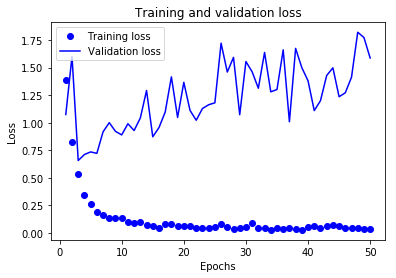

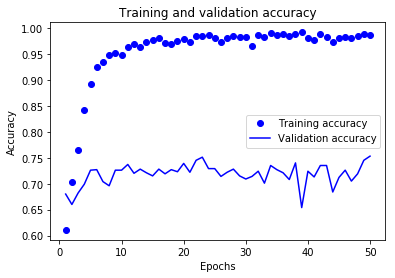

test_acc: 0.7139999997615815


In [0]:
# Noew we build the model.

backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history = model.fit_generator( # The image data must come from the image generator that takes the images from the correct dirrectory. https://keras.io/models/sequential/
    train_generator, # Images are taken from the train_generator
    steps_per_epoch=100, # The number of steps from the train_generator before one epoch if finished.  
                         # 100 steps * 20 batch size in train generator = 2000 training images per epoch. This way each traning image will be sampled once per epoch.
    epochs=50, # Train data for 50 epochs
    validation_data=validataion_generator, # Take data from the validataion generator
    validation_steps=50, # 50 steps * 20 batch size in validation generator = 1000 validation images per epoch
    verbose = 1) # We will not use call backs to stop early.

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50) # Test images are in a dirrectory so they must flow from dirrectory. 
                                                                           # 50 steps * 20 batch size in test generator = 1000 test images per epoch
print('test_acc:', test_acc)

model.save('cats_and_dogs_small_1.h5')

### The above model came out with about 71% accuracy. Which is pretty good considering we only used 2000 training images!  Now lets improve using data augmentation.
#### Data augmentation allows us to randomally transform images before sending them to the model for training.  The random transformation changes the images into 'new' images and allows for an increase in traning data without have additional images. https://keras.io/preprocessing/image/ 

---



In [0]:
datagen = ImageDataGenerator( # The image augmentaion function in Keras
    rotation_range=40, # Rotate the images randomly by 40 degrees
    width_shift_range=0.2, # Shift the image horizontally by 20%
    height_shift_range=0.2, # Shift the image veritcally by 20%
    shear_range=0.2, # Shear image by 20%
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True, # Flip image horizontally 
    fill_mode='nearest') # How to fill missing pixels after a augmentaion opperation

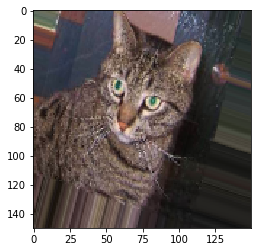

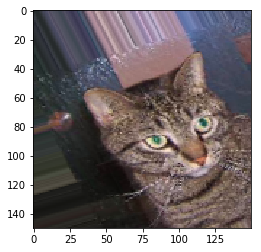

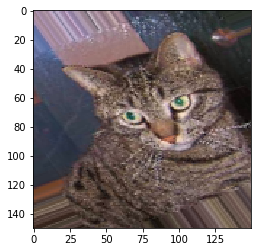

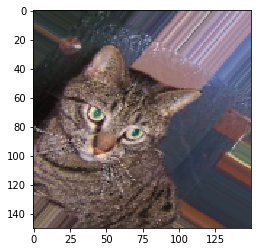

In [0]:
# Lets see the image augmentaion
from keras.preprocessing import image
img = image.load_img(os.path.join(train_cats_dir, os.listdir(train_cats_dir)[1]), target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
# Apply the data augmentation to our data.
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen2 = ImageDataGenerator(rescale=1./255) #Never apply data augmentation to test data.  You only want to normalize and resize test data. 

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validataion_generator2 = train_datagen2.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator2 = test_datagen2.flow_from_directory( # Resize test data
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/50
100/100 [==============================] - 48s 482ms/step - loss: 1.4422 - acc: 0.5909 - val_loss: 1.3344 - val_acc: 0.6250
Epoch 2/50
100/100 [==============================] - 45s 455ms/step - loss: 1.2777 - acc: 0.6338 - val_loss: 1.0515 - val_acc: 0.6314
Epoch 3/50
100/100 [==============================] - 54s 539ms/step - loss: 1.0480 - acc: 0.6672 - val_loss: 0.9175 - val_acc: 0.6726
Epoch 4/50
100/100 [==============================] - 54s 541ms/step - loss: 1.0356 - acc: 0.6628 - val_loss: 0.8367 - val_acc: 0.6804
Epoch 5/50
100/100 [==============================] - 51s 509ms/step - loss: 0.9292 - acc: 0.6756 - val_loss: 0.8371 - val_acc: 0.6523
Epoch 6/50
100/100 [==============================] - 48s 484ms/step - loss: 0.9320 - acc: 0.6706 - val_loss: 0.7925 - val_acc: 0.6733
Epoch 7/50
100/100 [==============================] - 49s 493ms/step - loss: 0.8429 - acc: 0.6916 - val_loss: 0.8225 - val_acc: 0.6440
Epoch 8/50
100/100 [==============================] - 4

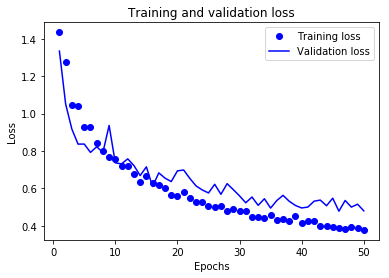

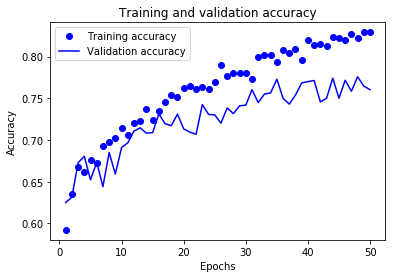

test_acc: 0.7480000019073486


In [0]:
backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = optimizers.adam(lr=0.0001), # We will lower learning rate
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


history = model.fit_generator(
    train_generator2,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validataion_generator2,
    validation_steps=50,
    verbose = 1)


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate_generator(test_generator2, steps = 50)
print('test_acc:', test_acc)

model.save('cats_and_dogs_small_2.h5')

## An inprovment, but not a suprise. Having more data helps our accuracy. 
### But why go through the hassle of building our own CNN when there are many networks that have used powerful GPUs to classify images? We can use the weights of their models and apply them to something as simple as classiying a dog and cat.  We will use weights of the VGG16 CNN that was trained using ImageNet data.  https://keras.io/applications/

In [0]:
from keras.applications import VGG16 # Import the VGG16 library. 

In [0]:
backend.clear_session()
conv_base = VGG16 (weights = 'imagenet', #Useing the VGG66 CNN that was trained on ImageNet data.  
                  include_top = False, # We are using our own classification (dog or cat) and not the ImageNet multiclassification. So include top = false.
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
conv_base.summary() # View the VGG16 model architecture.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### The output shape of the data after the VGG16 weights are applied is (4, 4, 512).  Remember it started as (150, 150, 3).  This is from the 2D convolutions and maxpooling steps.  There are also over 14 million parameters to train.  This is way too many for the Google GPU. And we do not want to retrain the weights of the VGG16, that defeats the whole purpose of transfer learning.  Instead we will freeze the VGG16 weights and add a dense layer at the end.  

In [0]:
conv_base.trainable = False # Freeze the VGG16 weights.

In [0]:
conv_base.summary()# Lets look at the parameters now.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Now the trainable parameters are 0.  We will only use the pretraind VGG16 weights.

In [0]:
modelvgg16 = models.Sequential()
modelvgg16.add(conv_base) # Add the VG166 weights
modelvgg16.add(layers.Flatten())
modelvgg16.add(layers.Dense(512, activation = 'relu'))
modelvgg16.add(layers.Dense(1, activation = 'sigmoid'))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 35s 352ms/step - loss: 0.4802 - acc: 0.7640 - val_loss: 0.3945 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 32s 319ms/step - loss: 0.4025 - acc: 0.8105 - val_loss: 0.3521 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 31s 307ms/step - loss: 0.3573 - acc: 0.8350 - val_loss: 0.3476 - val_acc: 0.8490
Epoch 4/30
100/100 [==============================] - 31s 311ms/step - loss: 0.3457 - acc: 0.8480 - val_loss: 0.3672 - val_acc: 0.8410
Epoch 5/30
100/100 [==============================] - 31s 311ms/step - loss: 0.3244 - acc: 0.8500 - val_loss: 0.3563 - val_acc: 0.8300
Epoch 6/30
100/100 [==============================] - 31s 312ms/step - loss: 0.3452 - acc: 0.8570 - val_loss: 0.3110 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 31s 309ms/

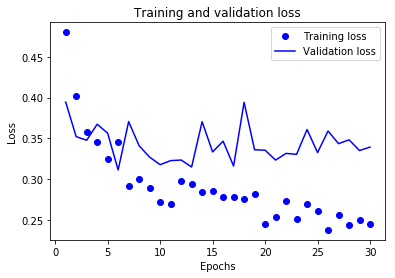

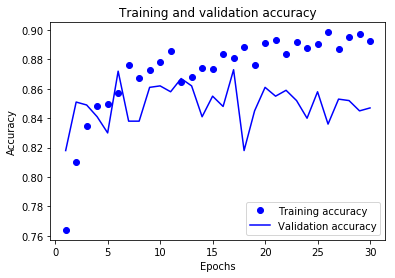

test_acc: 0.8999999976158142


In [0]:
# We will still use data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelvgg16.compile(optimizer = optimizers.adam(lr=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelvgg16.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validataion_generator,
    validation_steps=50)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelvgg16.evaluate_generator(test_generator, steps = 50)
print('test_acc:', test_acc)

modelvgg16.save('cats_and_dogs_small_3.h5')

### Our model keeps getting better. We might want to add a few 2D convolutions and max pooling layers before the dense layer, or we can train the last three 2D convolution layers and maxpooling layer of the VGG16 model.  

In [0]:
# Now we can freeze all the VGG weights except the last few, and train those before adding it to our dense layer.
backend.clear_session()
vgg16_base_2 = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))

# Here we freeze all the layers except the last 4.
for layer in vgg16_base_2.layers[:-4]:
  layer.trainable = False
for layer in vgg16_base_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f59f1aaeb38> False
<keras.layers.convolutional.Conv2D object at 0x7f59f5ee2128> False
<keras.layers.convolutional.Conv2D object at 0x7f59f1aaea20> False
<keras.layers.pooling.MaxPooling2D object at 0x7f59f2ffef60> False
<keras.layers.convolutional.Conv2D object at 0x7f59f1a461d0> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2f9b710> False
<keras.layers.pooling.MaxPooling2D object at 0x7f59f2f329e8> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2f32048> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2f5a518> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2f5aef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f59f2f0ac18> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2f0a978> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2ebb320> False
<keras.layers.convolutional.Conv2D object at 0x7f59f2ed3b38> False
<keras.layers.pooling.MaxPooling2D object at 0x7f59f2ee6f98>

In [0]:
vgg16_base_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 36s 359ms/step - loss: 0.4041 - acc: 0.8140 - val_loss: 0.3043 - val_acc: 0.8700
Epoch 2/30
100/100 [==============================] - 36s 359ms/step - loss: 0.2789 - acc: 0.8800 - val_loss: 0.3603 - val_acc: 0.8340
Epoch 3/30
100/100 [==============================] - 38s 381ms/step - loss: 0.2245 - acc: 0.9130 - val_loss: 0.4255 - val_acc: 0.8180
Epoch 4/30
100/100 [==============================] - 38s 380ms/step - loss: 0.2373 - acc: 0.9015 - val_loss: 0.2203 - val_acc: 0.9130
Epoch 5/30
100/100 [==============================] - 35s 345ms/step - loss: 0.1799 - acc: 0.9295 - val_loss: 0.2010 - val_acc: 0.9070
Epoch 6/30
100/100 [==============================] - 35s 349ms/step - loss: 0.1829 - acc: 0.9245 - val_loss: 0.2048 - val_acc: 0.9180
Epoch 7/30
100/100 [==============================] - 33s 335ms/

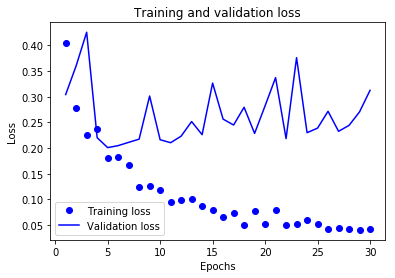

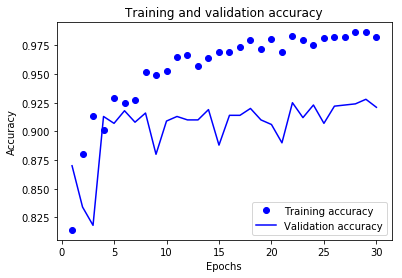

test_acc: 0.9319999933242797


In [0]:
modelvgg16_train = models.Sequential()
modelvgg16_train.add(vgg16_base_2)
modelvgg16_train.add(layers.Flatten())
modelvgg16_train.add(layers.Dense(512, activation = 'relu'))
modelvgg16_train.add(layers.Dense(1, activation = 'sigmoid'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

modelvgg16_train.compile(optimizer = optimizers.adam(lr=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = modelvgg16_train.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validataion_generator,
    validation_steps=50)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = modelvgg16_train.evaluate_generator(test_generator, steps = 50)
print('test_acc:', test_acc)

modelvgg16_train.save('cats_and_dogs_small_4.h5')

# Your Turn
### Build and optimize another model. Use weights from a different pretrained network (ie, ResNet, Inception, etc. not VGG. https://keras.io/applications/) from the Keras library. Optimize the model by adding additional layers, regularization, change activaction, adjust data augmentation etc.